In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('climate_action_data.csv')

#inspecting for the structure
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913 entries, 0 to 912
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Sensor_ID                      913 non-null    object
 1   Date                           909 non-null    object
 2   Soil_Moisture(%)               913 non-null    object
 3   Soil_pH                        913 non-null    object
 4   Temperature(C)                 913 non-null    object
 5   Humidity(%)                    913 non-null    object
 6   Crop_Type                      909 non-null    object
 7   Fertilizer_Recommended(kg/ha)  913 non-null    object
 8   Irrigation_Recommended(mm)     913 non-null    object
 9   Drone_Image_ID                 913 non-null    object
dtypes: object(10)
memory usage: 71.5+ KB


,Sensor_ID,Date,Soil_Moisture(%),Soil_pH,Temperature(C),Humidity(%),Crop_Type,Fertilizer_Recommended(kg/ha),Irrigation_Recommended(mm),Drone_Image_ID
0,SEN-1000,2025-01-01,36.22,6.98,21.3,50.4,Tomatoes,67.6,26.6,IMG-2000
1,SEN-1001,2025-01-02,76.55,5.03,23.5,34.3,Wheat,130.4,8.3,IMG-2001
2,SEN-1002,2025-01-03,61.24,6.52,21.9,54.6,Tomatoes,36.0,29.4,IMG-2002
3,SEN-1003,2025-01-04,51.91,6.62,24.0,48.7,Maize,85.8,19.6,IMG-2003
4,SEN-1004,2025-01-05,20.92,5.98,19.2,70.6,Wheat,75.6,29.9,IMG-2004


In [ ]:
#checking for missing values
df.isnull().sum()


Sensor_ID                        0
Date                             4
Soil_Moisture(%)                 0
Soil_pH                          0
Temperature(C)                   0
Humidity(%)                      0
Crop_Type                        4
Fertilizer_Recommended(kg/ha)    0
Irrigation_Recommended(mm)       0
Drone_Image_ID                   0
dtype: int64

In [ ]:
#checking for the data types of the columns
df.dtypes

Sensor_ID                        object
Date                             object
Soil_Moisture(%)                 object
Soil_pH                          object
Temperature(C)                   object
Humidity(%)                      object
Crop_Type                        object
Fertilizer_Recommended(kg/ha)    object
Irrigation_Recommended(mm)       object
Drone_Image_ID                   object
dtype: object

In [ ]:
#checking for duplicates
duplicate = df.duplicated()
if duplicate.empty:
    print("No duplicate rows found.")
else:
    print(f"the sum of the duplicated values are {duplicate.sum()}")
    print("The duplicated values are:")
    print(df[duplicate])


the sum of the duplicated values are 111
The duplicated values are:
    Sensor_ID        Date Soil_Moisture(%) Soil_pH Temperature(C) Humidity(%)  \
800  SEN-1008  2025-01-09            52.08    6.08           22.0        89.3   
802  SEN-1175  2025-06-25            22.21    5.42           23.4        68.4   
803  SEN-1735  2027-01-06             71.4    4.93           24.5        67.0   
804  SEN-1242  2025-08-31            74.04    5.62           25.5        76.9   
805  SEN-1764  2027-02-04            12.35    7.38           27.8        33.4   
..        ...         ...              ...     ...            ...         ...   
908  SEN-1090  2025-04-01            18.37    7.03           21.0        47.1   
909  SEN-1201  2025-07-21            15.89     6.4           30.5        33.3   
910  SEN-1309  2025-11-06            28.96    5.04           20.5        47.6   
911  SEN-1339  2025-12-06            16.85    6.57           19.3        34.5   
912  SEN-1050  2025-02-20            77.8

In [30]:

#replacing the error with NaN 
df.replace('error',np.nan, inplace=True)

#converting to numerical data types

all_cols = ["Soil_Moisture(%)","Soil_pH","Temperature(C)","Humidity(%)","Fertilizer_Recommended(kg/ha)","Irrigation_Recommended(mm)"]
for cols in all_cols:
    if cols in df.columns:
        df[cols] = pd.to_numeric(df[cols], errors='coerce')
 
#handling duplicated data
df.drop_duplicates(inplace=True)
print(f"checking for the duplicates again: {df.duplicated().sum()}")

#handling the missing data values
#removing the rows with missing values
df.dropna(subset=all_cols, inplace=True)
#filling the missing values with the mode of the column
df['Crop_Type'].fillna(df['Crop_Type'].mode()[0], inplace=True)
df['Date'].fillna('Unknown', inplace=True)

print(f"checking for the missing values again: {df.isnull().sum().sum()}")

#converting the date column to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='mixed', errors='coerce')

#checking for duplicate rows again
print(f"checking for the duplicates again: {df.duplicated().sum()}")
#checking the data types again
print(df.dtypes)
#describing the data
print("the description of the data is:")
print(df.describe())




checking for the duplicates again: 0
checking for the missing values again: 0
checking for the duplicates again: 0
Sensor_ID                                object
Date                             datetime64[ns]
Soil_Moisture(%)                        float64
Soil_pH                                 float64
Temperature(C)                          float64
Humidity(%)                             float64
Crop_Type                                object
Fertilizer_Recommended(kg/ha)           float64
Irrigation_Recommended(mm)              float64
Drone_Image_ID                           object
dtype: object
the description of the data is:
                                Date  Soil_Moisture(%)     Soil_pH  \
count                            793        797.000000  797.000000   
mean   2026-02-04 19:25:48.045397504         44.763726    6.248795   
min              2025-01-01 00:00:00         10.350000    4.520000   
25%              2025-07-20 00:00:00         26.930000    5.320000   
50%      

C:\Users\HP 250 G8\AppData\Local\Temp\ipykernel_11672\2456770596.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Crop_Type'].fillna(df['Crop_Type'].mode()[0], inplace=True)
C:\Users\HP 250 G8\AppData\Local\Temp\ipykernel_11672\2456770596.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always be

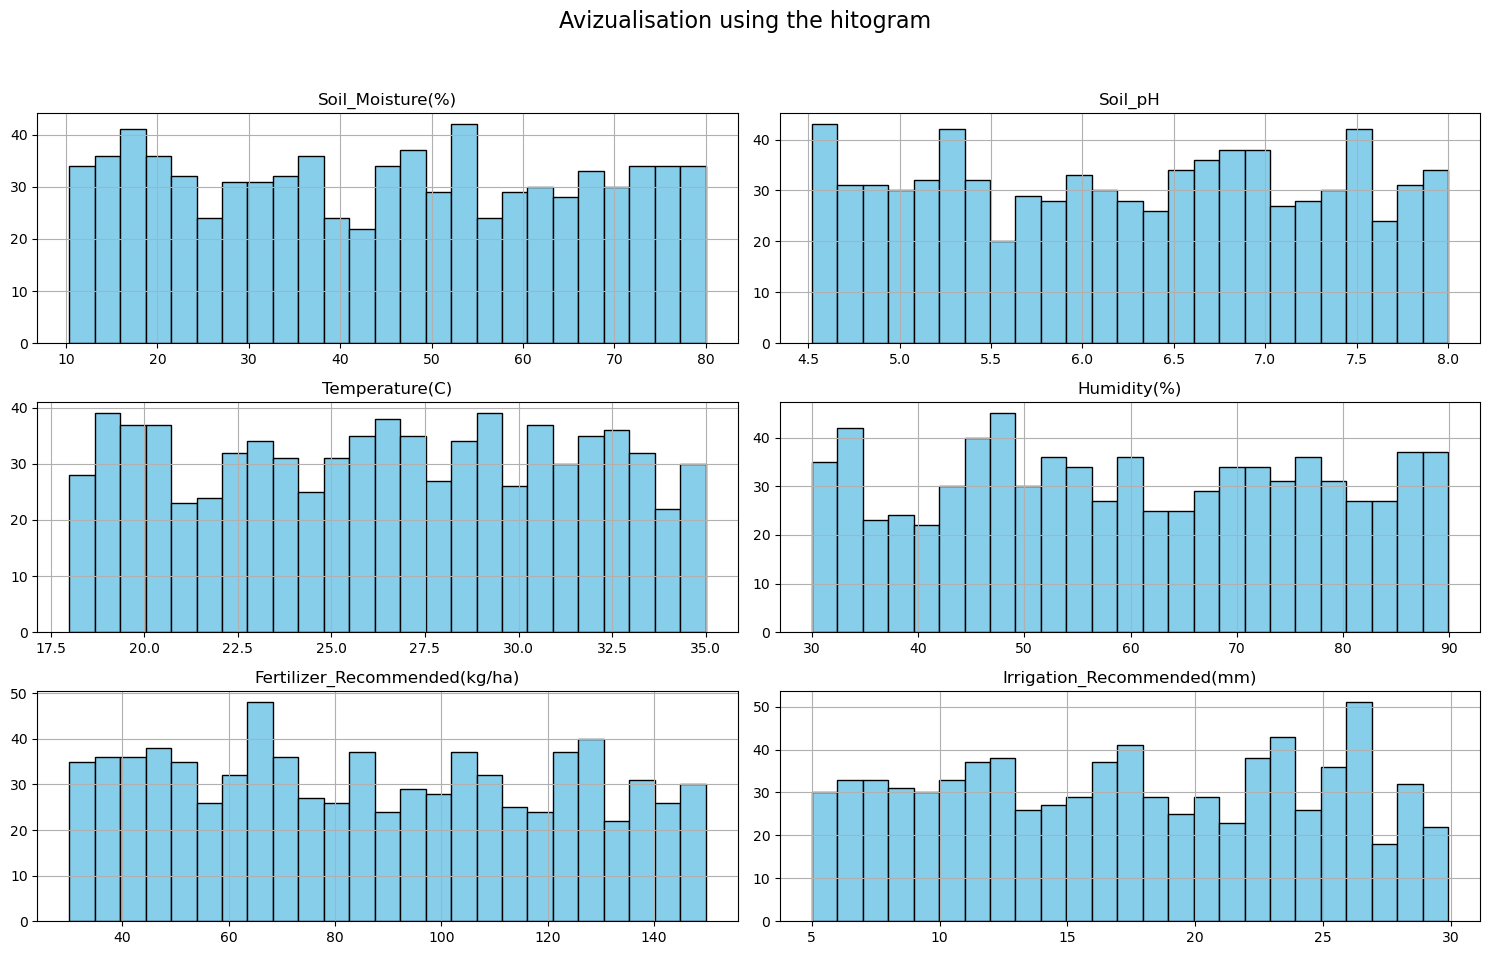

In [31]:
#visualizing the data
#drawing a histogram

df[all_cols].hist(bins=25, layout=(3,2), figsize=(15, 10), color='skyblue', edgecolor='black')
plt.suptitle('Avizualisation using the hitogram', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


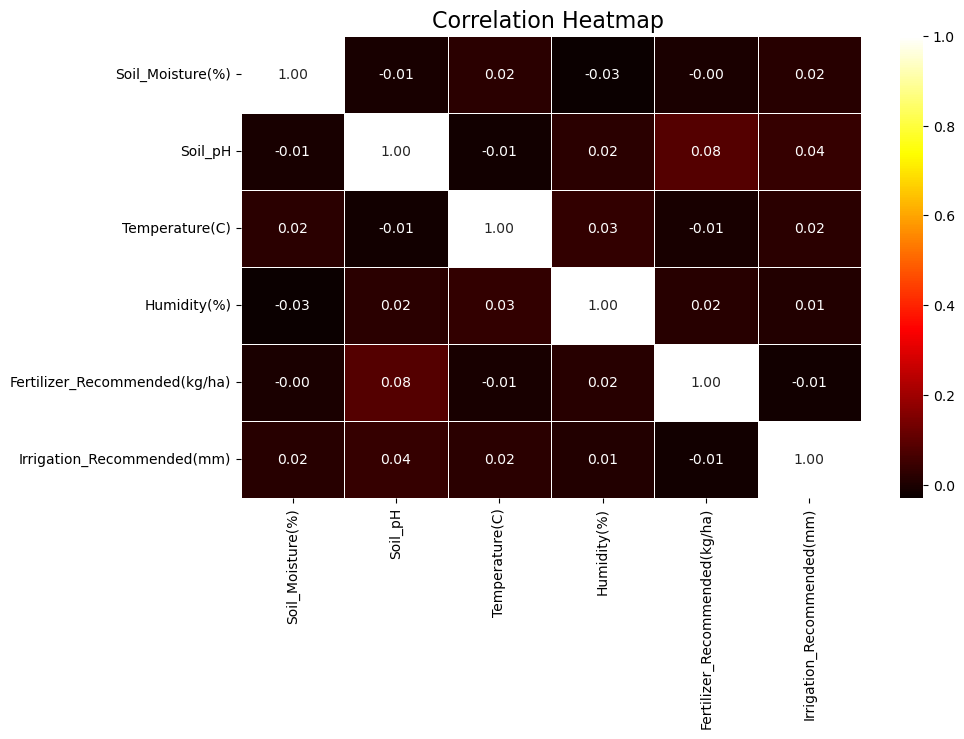

In [33]:
#correlation Heatmap
import seaborn as sns
plt.figure(figsize=(10, 6))
corr = df[all_cols].corr()
sns.heatmap(corr, annot=True, cmap='hot', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap ', fontsize=16)
plt.show()

In [ ]:
# crop type with highest average soil moisture
avgerage_moisture = df.groupby('Crop_Type')['Soil_Moisture(%)'].mean().sort_values(ascending=False)
print("Crop type with highest average soil moisture:")
print(avgerage_moisture)

Crop type with highest average soil moisture:
Crop_Type
Wheat       47.368857
Maize       44.952078
Beans       44.389139
Tomatoes    43.809760
Lettuce     42.970200
Name: Soil_Moisture(%), dtype: float64


In [35]:
#irrigation adjustment for the crops that are greater than 30 degrees celsius
heated_crops = df[df['Temperature(C)'] > 30]
irrigation = heated_crops.groupby('Crop_Type')['Irrigation_Recommended(mm)'].mean().sort_values(ascending=False)
print("Crops with irrigation adjustment for temperature greater than 30 degrees Celsius:")
print(irrigation)

Crops with irrigation adjustment for temperature greater than 30 degrees Celsius:
Crop_Type
Tomatoes    18.919565
Wheat       18.645946
Beans       17.857692
Maize       16.625455
Lettuce     16.297297
Name: Irrigation_Recommended(mm), dtype: float64
